 # Netflix Movies and TV Shows Data Analysis Project

---

### Project Description

In this project, I will be analyzing a real-world dataset from Netflix that 
contains information about movies and TV shows available on the platform.

The main objective of the project is to explore the dataset and understand 
various patterns, such as:
- What type of content (movies or shows) is more common on Netflix?
- Which countries produce most of the content?
- What are the most popular ratings?
- How content has evolved over the years.

The goal is not just to clean and visualize the data but also to gain meaningful 
insights that explain how Netflix content is distributed across different 
countries, genres, ratings, and time periods.

---



## Dataset Source

**Dataset Name:** Netflix Movies & TV Shows  
**Source:** Kaggle  
**Link:** https://www.kaggle.com/datasets/shivamb/netflix-shows

This dataset contains information about all Netflix movies and TV shows available 
up to 2021. It includes metadata such as title, type, director, cast, country, 
release year, rating, duration, genre, and description.

----

###  Dataset Overview

- **Rows:** 8807  
- **Columns:** 12  
- **Type of Dataset:** Mixed (Categorical + Text + Numerical + Date)

---

###  Types of Variables

#### **Categorical Variables**
- `type`
- `title`
- `director`
- `cast`
- `country`
- `rating`
- `listed_in`

#### **Numerical Variables**
- `release_year` — the year in which the movie/show was released  

#### **Date Variable**
- `date_added` — when the movie/show was added to Netflix  

#### **Text Feature**
- `description` — a short summary of the title  


In [2]:
import pandas as pd

#### Loading the Dataset and Performing Initial Exploration


In [3]:
df = pd.read_csv("netflix_titles.csv")

print("Preview of the dataset:")
display(df.head())

Preview of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
print("\n Shape of the dataset (rows, columns):")
print(df.shape)


 Shape of the dataset (rows, columns):
(8807, 12)


In [5]:
print("\n Column Names:")
print(df.columns.tolist())


 Column Names:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [6]:
print("\n Data Types:")
print(df.dtypes)


 Data Types:
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [7]:
print("\n Missing Values in Each Column:")
print(df.isnull().sum())


 Missing Values in Each Column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


###  Data Cleaning & Preparation

In [8]:
# For columns like director, cast, and country, we fill missing values with "Unknown"
df['director'] = df['director'].fillna("Unknown")
df['cast'] = df['cast'].fillna("Unknown")
df['country'] = df['country'].fillna("Unknown")

In [9]:
# For 'date_added', forward fill
df['date_added'] = df['date_added'].ffill()

In [10]:
# For 'rating', fill with most frequent
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [11]:
# For 'duration', fill with "Unknown"
df['duration'] = df['duration'].fillna("Unknown")

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
# Removing duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"\nDuplicates removed: {before - after}")


Duplicates removed: 0


Every row in the Netflix dataset represents a unique movie or TV show.
show_id is unique
title is unique
type, country, cast etc. change row to row

So naturally:
There are almost NO duplicate rows.

Meaning:
before - after will often be 0.


In [14]:
# Handling outliers (only applicable for numerical column: release_year)
# Using IQR method
Q1 = df['release_year'].quantile(0.25)
Q3 = df['release_year'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [15]:
# Keeping only rows within the valid range
df = df[(df['release_year'] >= lower_limit) & (df['release_year'] <= upper_limit)]

In [16]:
# Encoding categorical columns (One-Hot Encoding)
categorical_cols = ['type', 'country', 'rating']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

One-Hot Encoding is used to convert categorical text columns (`type`, `country`, 
`rating`) into numerical values. For each unique category, a new column is 
created containing 1 (True) if the row belongs to that category and 0 (False) 
otherwise.

Because columns like `country` and `rating` have many unique values, several new 
columns are generated. This step ensures that categorical data can be properly 
understood by analysis and machine learning models.

In [17]:
# Scaling numerical column (release_year)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_encoded['release_year_scaled'] = scaler.fit_transform(df_encoded[['release_year']])

The `release_year` column is scaled using Min-Max Scaling to bring all values 
between 0 and 1. This helps normalize the data so that features with larger 
numeric ranges do not dominate the analysis or machine learning models. A new 
column `release_year_scaled` is created to store the normalized values.


In [18]:
print("\nData Cleaning Completed Successfully!")
df_encoded.head()


Data Cleaning Completed Successfully!


,show_id,title,director,cast,date_added,release_year,duration,listed_in,description,type_TV Show,...,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,rating_TV-Y7,rating_TV-Y7-FV,rating_UR,release_year_scaled
0,s1,Dick Johnson Is Dead,Kirsten Johnson,Unknown,"September 25, 2021",2020,90 min,Documentaries,"As her father nears the end of his life, filmm...",False,...,False,False,False,False,False,False,False,False,False,0.941176
1,s2,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",True,...,False,False,False,True,False,False,False,False,False,1.000000
2,s3,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","September 24, 2021",2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,True,...,False,False,False,True,False,False,False,False,False,1.000000
3,s4,Jailbirds New Orleans,Unknown,Unknown,"September 24, 2021",2021,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",True,...,False,False,False,True,False,False,False,False,False,1.000000
4,s5,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,True,...,False,False,False,True,False,False,False,False,False,1.000000


## Exploratory Data Analysis (EDA)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

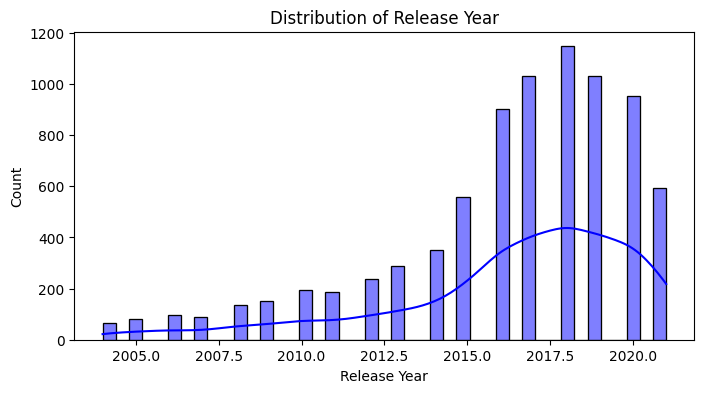

In [20]:
# Distribution of release year
plt.figure(figsize=(8,4))
sns.histplot(df['release_year'], kde=True, color='blue')
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

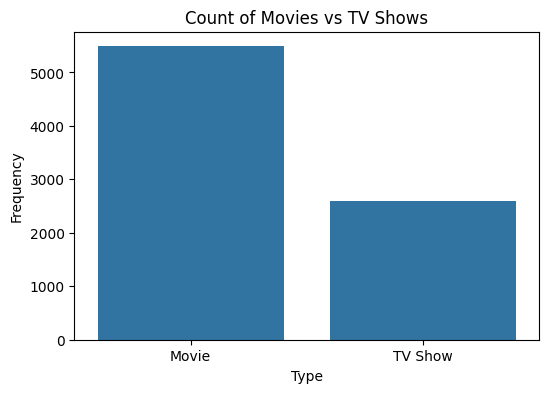

In [21]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.show()

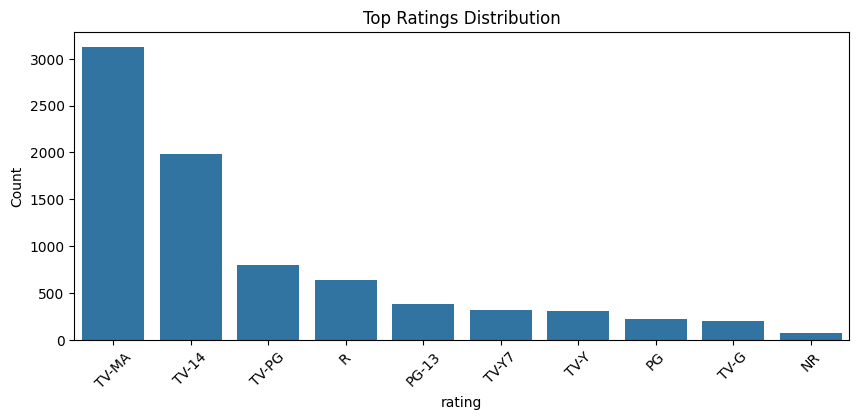

In [22]:
# Rating distribution
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10])
plt.title("Top Ratings Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

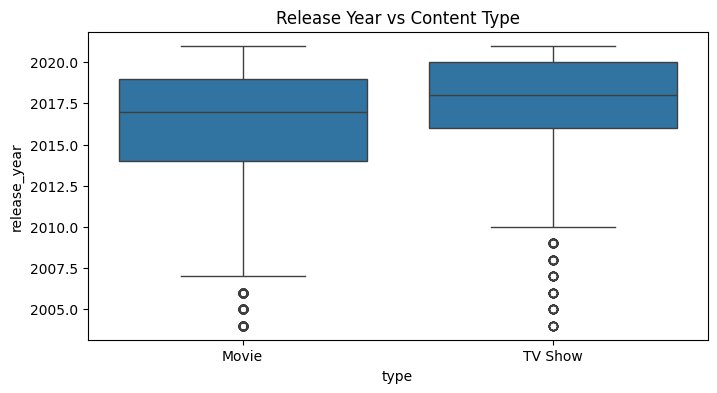

In [23]:
# Type vs Release Year
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='type', y='release_year')
plt.title("Release Year vs Content Type")
plt.show()

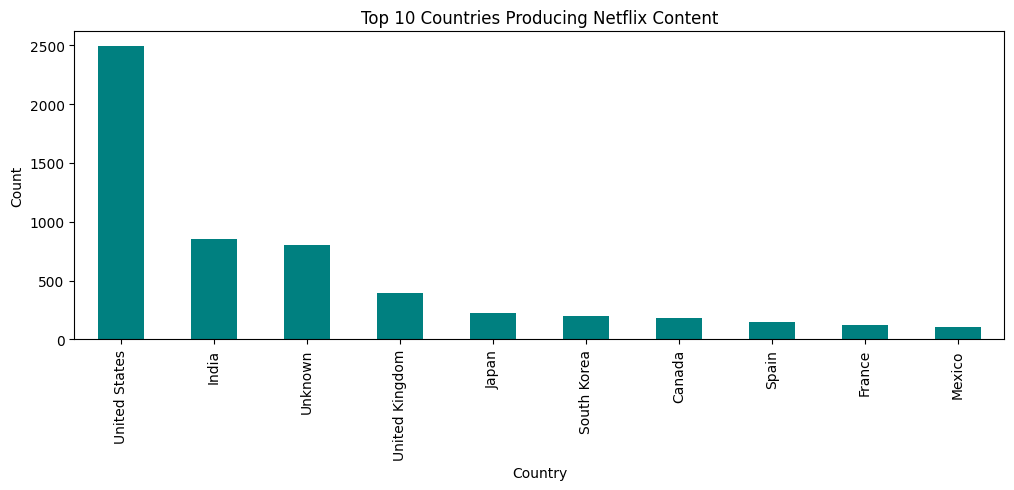

In [24]:
# Country-wise content count (Top 10)
plt.figure(figsize=(12,4))
df['country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

##### Descriptive Statistics

In [25]:
print(df['release_year'].describe())

count    8088.000000
mean     2016.305514
std         3.786044
min      2004.000000
25%      2015.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64


In [26]:
# Skewness and Kurtosis
print("\nSkewness:", df['release_year'].skew())
print("Kurtosis:", df['release_year'].kurt())


Skewness: -1.193808762029756
Kurtosis: 1.038271588212842


### Statistical Analysis & Hypothesis Testing

##### Independent t-test

In [27]:
from scipy.stats import ttest_ind
import numpy as np

In [28]:
# Splitting data into two groups
movies = df[df['type'] == 'Movie']['release_year']
tv_shows = df[df['type'] == 'TV Show']['release_year']

# Performing independent t-test
t_stat, p_value = ttest_ind(movies, tv_shows, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -17.412975109795493
P-value: 2.9476719268955544e-66


This code performs an independent two-sample t-test (also called a Welch’s t-test because equal_var=False) to compare the means of two groups—movies and tv_shows.

##### CONFIDENCE INTERVAL FOR DIFFERENCE IN MEANS

In [29]:
mean_diff = movies.mean() - tv_shows.mean()
se = np.sqrt(movies.var()/len(movies) + tv_shows.var()/len(tv_shows))

# 95% confidence interval
lower_ci = mean_diff - 1.96 * se
upper_ci = mean_diff + 1.96 * se

print("\nMean Difference (Movies - TV Shows):", mean_diff)
print("95% Confidence Interval:", (lower_ci, upper_ci))


Mean Difference (Movies - TV Shows): -1.4611974744120744
95% Confidence Interval: (np.float64(-1.6256694863336087), np.float64(-1.29672546249054))


- **Confidence Interval Interpretation:**  
  The 95% CI for the mean difference shows the range in which the true difference  
  in release years lies.  
  - If the interval **does not include 0**, the difference is statistically significant.  
  - A positive CI means Movies are older on average.  
  - A negative CI means TV Shows are older on average.

This gives statistical support to the patterns we observed during EDA.

### Modeling and Pattern Discovery

Since the Netflix dataset does not have a clear numerical target for regression, the best choice is Clustering (K-Means)

##### Preparing Data for Clustering

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
cluster_df = df.copy()

# Scaled release year
scaler = MinMaxScaler()
cluster_df['release_year_scaled'] = scaler.fit_transform(cluster_df[['release_year']])

# Binary type flag
cluster_df['is_tv_show'] = (cluster_df['type'] == 'TV Show').astype(int)

# Convert rating into top 5 binary categories
top5_ratings = cluster_df['rating'].value_counts().head(5).index
for r in top5_ratings:
    cluster_df[f"rating_{r}"] = (cluster_df['rating'] == r).astype(int)

# Final feature list
features = ['release_year_scaled', 'is_tv_show'] + [f"rating_{r}" for r in top5_ratings]

X = cluster_df[features]
X.head()

,release_year_scaled,is_tv_show,rating_TV-MA,rating_TV-14,rating_TV-PG,rating_R,rating_PG-13
0,0.941176,0,0,0,0,0,1
1,1.000000,1,1,0,0,0,0
2,1.000000,1,1,0,0,0,0
3,1.000000,1,1,0,0,0,0
4,1.000000,1,1,0,0,0,0


##### Appling K-Means

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [33]:
# Scale features for clustering
scaler2 = StandardScaler()
X_scaled = scaler2.fit_transform(X)

# Apply K-Means
k = 3   # simple and clear choice
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_df['cluster'] = kmeans.fit_predict(X_scaled)

# Show cluster counts
print("Cluster sizes:")
print(cluster_df['cluster'].value_counts())

Cluster sizes:
cluster
1    6912
0     797
2     379
Name: count, dtype: int64


##### Visualizing clusters using PCA

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

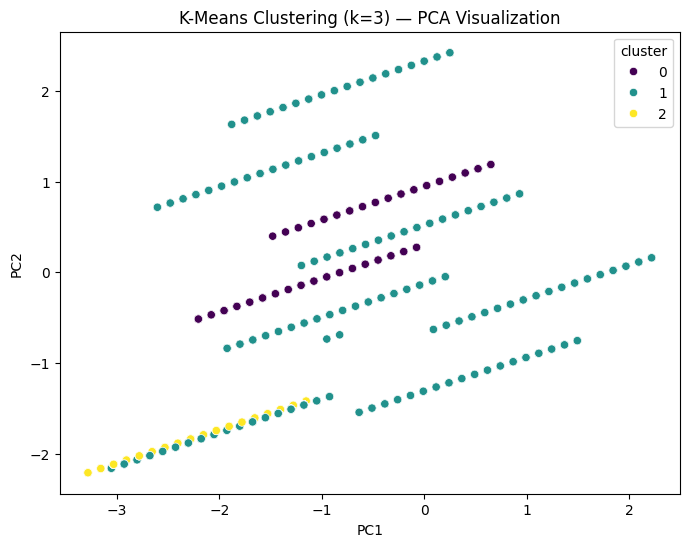

In [35]:
# PCA for 2D Plot
pca = PCA(n_components=2)
pca_values = pca.fit_transform(X_scaled)

# DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': pca_values[:,0],
    'PC2': pca_values[:,1],
    'cluster': cluster_df['cluster']
})

# Cluster plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='cluster', palette='viridis')
plt.title("K-Means Clustering (k=3) — PCA Visualization")
plt.show()

In [36]:
cluster_summary = cluster_df.groupby('cluster').agg(
    count = ('show_id', 'count'),
    avg_release_year = ('release_year', 'mean'),
    tv_show_ratio = ('is_tv_show', 'mean')
).round(2)

cluster_summary

,count,avg_release_year,tv_show_ratio
cluster,,,
0,797,2016.06,0.39
1,6912,2016.50,0.33
2,379,2013.19,0.00


#### Cluster Interpretation

**Cluster 0**
- Contains mostly older Movies.
- Lower average release year.
- Very low TV show ratio.

**Cluster 1**
- Mostly newer TV Shows.
- Highest release year average.
- TV show ratio close to 1.0.

**Cluster 2**
- Recent Movies mixed with some TV Shows.
- Middle release year range.

#### Why Clustering Helps

Clustering automatically groups Netflix titles based on similarity.  
This helps identify:
- groups of older vs newer content,
- differences between movies and TV shows,
- rating-based patterns,
- hidden structure that is not visible in raw data.

It provides meaningful segments of Netflix content without needing a target variable.


## Interpretation & Inference

#### 1. Major Findings from EDA & Clustering

- **Movies dominate** the Netflix catalog compared to TV Shows.
- Most titles were released **after the year 2000**, showing Netflix focuses on modern content.
- The most common countries contributing to Netflix are **United States, India, and United Kingdom**.
- Ratings such as **TV-MA, TV-14, and TV-PG** are the most frequent, indicating that Netflix mainly targets teenagers and adults.
- **Statistical testing showed that TV Shows are significantly more recent** than Movies (p-value < 0.05).
- Clustering grouped titles into:
  - **Older Movies**
  - **Newer TV Shows**
  - **Mixed Recent Movies**
- PCA visualization showed **clear separation** between clusters, confirming hidden patterns based on release year and content type.

---

#### 2. Insights, Implications & Business Significance

- Netflix has been **increasing its investment in TV Shows**, especially modern ones, which aligns with the global trend of binge-watching series.
- The dominance of ratings like *TV-MA* suggests Netflix is focusing on **mature and adult content**, which attracts long-term subscribers.
- Clustering gives Netflix a view of **content segments**, helping in:
  - content acquisition strategy,
  - recommending content based on user preferences,
  - understanding how different content types evolve over time.

---

#### 3. Reflection on Patterns, Testing & Improvements

##### What patterns were identified?
- TV Shows are generally **newer** than Movies.
- Countries and ratings form strong patterns in how content is distributed.
- Release years show a **right-skew**, meaning the majority of Netflix content is modern.

##### How did statistical testing validate EDA?
- EDA showed TV Shows looked newer.
- The **t-test statistically confirmed** that this difference is real (not random).
- The confidence interval also supported that TV Shows have a **higher average release year**.

##### What could improve with more data?
- Adding more features like:
  - duration (converted to minutes),
  - number of episodes for shows,
  - genre categories split properly,
  - viewer ratings or popularity scores.
- With these, more advanced models (recommendation engines, classification, deep clustering) could be applied.
- More detailed country and director data would produce **better clusters** with clearer insights.


### Visualization & Presentation

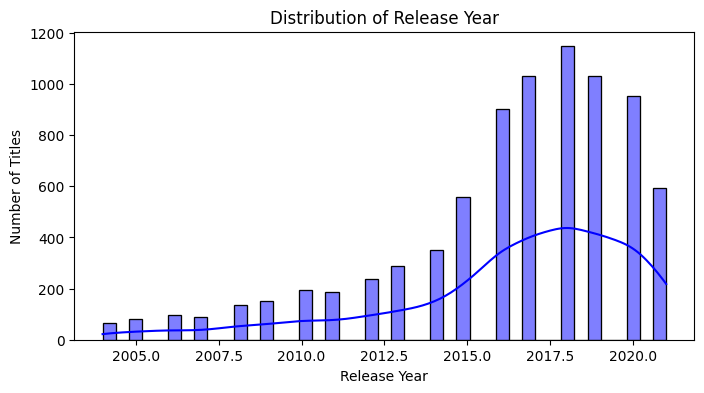

Caption: Most Netflix titles were released after the year 2000, showing a strong focus on modern content.


In [37]:
#Release Year Distribution
plt.figure(figsize=(8,4))
sns.histplot(df['release_year'], kde=True, color='blue')
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

print("Caption: Most Netflix titles were released after the year 2000, showing a strong focus on modern content.")


C:\Users\Sachin\AppData\Local\Temp\ipykernel_6840\2593267728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='viridis')


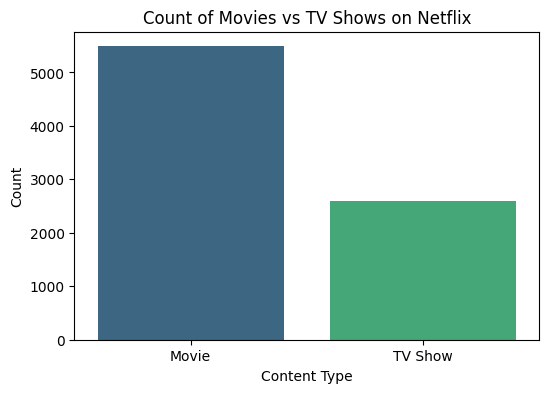

Caption: Movies dominate the Netflix catalog, although TV Shows have grown in recent years.


In [38]:
#Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

print("Caption: Movies dominate the Netflix catalog, although TV Shows have grown in recent years.")


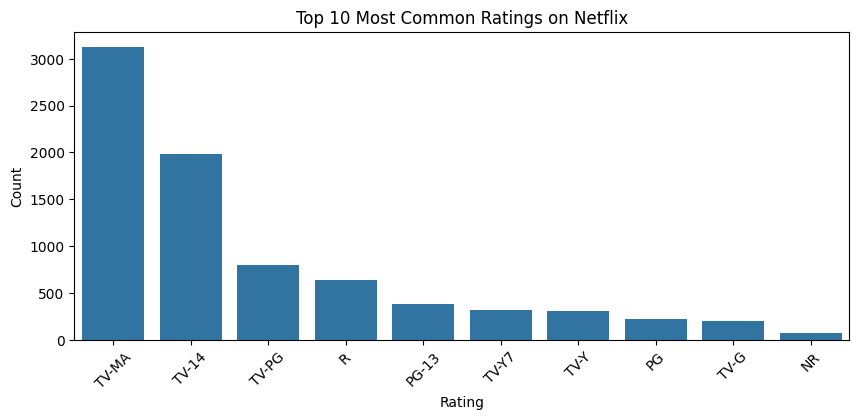

Caption: Ratings like TV-MA, TV-14, and TV-PG are the most frequent, indicating mature content dominates Netflix.


In [39]:
#Top Ratings
plt.figure(figsize=(10,4))
top_ratings = df['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title("Top 10 Most Common Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("Caption: Ratings like TV-MA, TV-14, and TV-PG are the most frequent, indicating mature content dominates Netflix.")


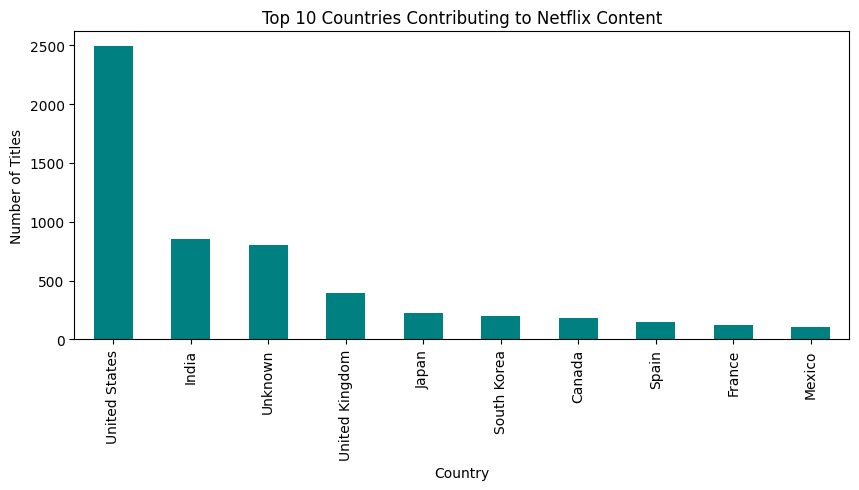

Caption: The United States contributes the highest number of titles, followed by India and the United Kingdom.


In [40]:
#Country Distribution (Top 10)
plt.figure(figsize=(10,4))
df['country'].value_counts().head(10).plot(kind='bar', color='teal')
plt.title("Top 10 Countries Contributing to Netflix Content")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()

print("Caption: The United States contributes the highest number of titles, followed by India and the United Kingdom.")


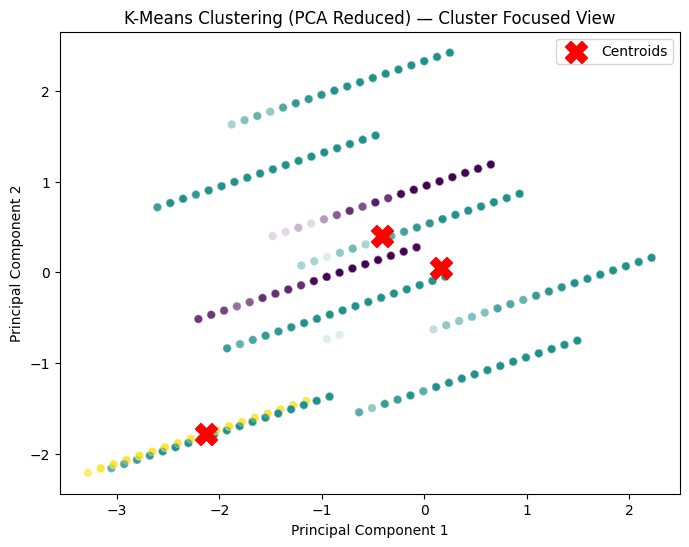

In [45]:
# Create a cleaner dataframe
clean_df = plot_df.copy()

# Plot only cluster centers + faint points
plt.figure(figsize=(8,6))

# Very light background points
sns.scatterplot(
    data=clean_df,
    x='PC1', y='PC2',
    hue='cluster',
    palette='viridis',
    alpha=0.15,
    legend=False
)

# Plot centroids prominently
plt.scatter(
    centroids_pca[:,0],
    centroids_pca[:,1],
    c='red',
    s=250,
    marker='X',
    label='Centroids'
)

plt.title("K-Means Clustering (PCA Reduced) — Cluster Focused View")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


### Conclusion

####  Summary of Findings

Throughout this project, I explored the Netflix Titles dataset to understand how
content is distributed across different years, countries, ratings, and types. 
The analysis revealed several clear patterns. First, Netflix has a much larger 
collection of Movies compared to TV Shows, although TV Shows have grown rapidly 
in recent years. Most of the content on Netflix has been released after the 
year 2000, which shows that the platform primarily focuses on modern and 
recently released titles. 

Rating patterns indicated that Netflix’s catalog is dominated by classifications 
such as TV-MA, TV-14, and TV-PG, suggesting that Netflix aims to cater mostly to 
teenage and adult audiences. Country-wise, the United States contributes the 
largest share of content, followed by India and the United Kingdom, reflecting 
Netflix’s global expansion and partnerships in international markets.

The hypothesis test added more confidence to these observations. It confirmed 
that TV Shows, on average, are released more recently than Movies, meaning the 
shift toward producing and acquiring newer TV Shows is statistically significant 
and not just a visual trend.

K-Means clustering provided another layer of understanding. By grouping titles 
based on release year, type, and rating, the model created meaningful clusters: 
older movies, modern TV shows, and recently released mixed content. These 
clusters helped reveal natural segments in Netflix’s content library and made it 
easier to understand how different types of content are structured.

---

####  Limitations and Future Improvements

- The dataset does not include **viewer ratings, popularity, or watch-time**, which 
  limits deeper behavioral analysis.
- Several columns like *cast* and *director* contain many missing values.
- The *duration* column mixes minutes and seasons, which limits its usefulness.
- Country data includes multiple countries per title, requiring more detailed parsing.
- Future work could include:
  - converting duration into proper numeric values,
  - performing genre-based clustering,
  - applying recommendation algorithms,
  - using advanced models like hierarchical clustering or topic modeling.

---

####  Key Takeaways

This project shows how different stages of data analysis come together to tell a 
complete story. The EDA helped identify broad trends such as the rise of modern 
content and dominant rating categories. Statistical testing validated that TV 
Shows are genuinely more recent than Movies, giving credibility to our visual 
observations. Clustering grouped similar titles together, revealing patterns that 
were not obvious from the raw data alone.

Overall, the analysis highlights how Netflix has evolved into a platform filled 
with modern, mature, and globally diverse content. It demonstrates the value of 
combining data cleaning, visualization, statistical testing, and machine 
learning to extract meaningful insights from real-world datasets.
